In [1]:
import pymysql
import pandas as pd
%matplotlib inline

In [2]:
connection = pymysql.connect(
    host="server.cory.sh",
    user="csci440",
    password="",
    db="imdb",
    cursorclass=pymysql.cursors.DictCursor
)

In [3]:
cursor = connection.cursor()

In [4]:
sql = """
SELECT 
    genre, keyword, count(*) as count
FROM
    TitleGenre,
    Top5000MovieKeywords
WHERE
    Top5000MovieKeywords.movieId = TitleGenre.titleId
GROUP BY genre, keyword;
"""
cursor.execute(sql)

29012

In [7]:
items = cursor.fetchall()

In [8]:
keyword_total = {}
for row in items:
    genre = row['genre']
    keyword = row['keyword']
    count = row['count']
    if genre not in keyword_total:
        keyword_total[genre] = {}
    keyword_total[genre][keyword] = count

In [9]:
def top_10(keywords):
    sorted_top = sorted(keywords.items(), key=lambda item: item[1], reverse=True)
    return sorted_top[:10]

In [10]:
def get_class_probabilities(keyword):
    totals = []
    for genre in keyword_total.keys():
        if keyword in keyword_total[genre]:
            totals.append(keyword_total[genre][keyword])
        else:
            totals.append(0)
    total = sum(totals)
    return_probabilities = {}
    for i, genre in zip(range(len(keyword_total.keys())), keyword_total.keys()):
        if total == 0:
            return_probabilities[genre] = 0
        else:
            return_probabilities[genre] = totals[i] / total
    return return_probabilities

In [12]:
top_10_list = {}
for genre in keyword_total.keys():
    top_10_list[genre] = top_10(keyword_total[genre])

In [13]:
top_10_list

{'action': [('police', 48),
  ('murder', 40),
  ('alien', 36),
  ('battle', 31),
  ('fbi', 31),
  ('terrorist', 31),
  ('assassin', 30),
  ('prison', 30),
  ('rescue', 29),
  ('death', 28)],
 'adventure': [('alien', 36),
  ('king', 29),
  ('island', 24),
  ('rescue', 24),
  ('friend', 21),
  ('escape', 20),
  ('planet', 19),
  ('princess', 19),
  ('battle', 17),
  ('revenge', 17)],
 'animation': [('dog', 11),
  ('princess', 11),
  ('friend', 10),
  ('alien', 9),
  ('robot', 8),
  ('monster', 7),
  ('boy', 6),
  ('escape', 6),
  ('rescue', 6),
  ('animal', 5)],
 'biography': [('love', 16),
  ('based on true story', 12),
  ('singer', 11),
  ('coach', 9),
  ('friendship', 9),
  ('1960s', 7),
  ('1970s', 6),
  ('boxing', 6),
  ('fbi', 6),
  ('president', 6)],
 'comedy': [('friend', 91),
  ('love', 80),
  ('high school', 47),
  ('new york city', 43),
  ('wedding', 43),
  ('marriage', 38),
  ('friendship', 37),
  ('dog', 36),
  ('murder', 33),
  ('school', 33)],
 'crime': [('murder', 81),
  

[Text(0,0,'death'),
 Text(0,0,'rescue'),
 Text(0,0,'prison'),
 Text(0,0,'assassin'),
 Text(0,0,'terrorist'),
 Text(0,0,'fbi'),
 Text(0,0,'battle'),
 Text(0,0,'alien'),
 Text(0,0,'murder'),
 Text(0,0,'police')]

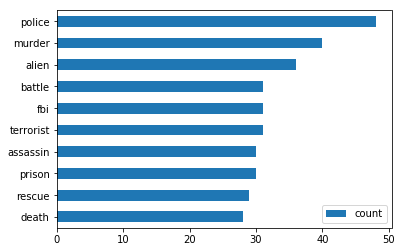

In [29]:
import matplotlib.pyplot as plt

plt.figure()
action = top_10_list['action']
df = pd.DataFrame(action, columns=["keyword", "count"])
df = df[::-1]
ax = df.plot(yticks=df.index, kind="barh")
ax.set_yticklabels(df.keyword)

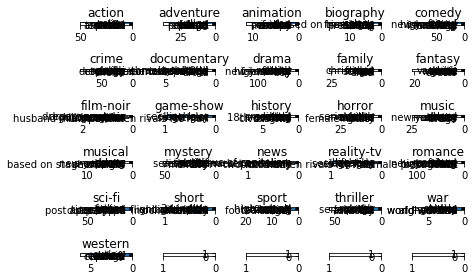

In [71]:
import matplotlib.pyplot as plt

nrows = 6
ncols = 5
f, axis = plt.subplots(nrows=nrows, ncols=ncols)

row = 0
col = 0
for genre in keyword_total.keys():
    action = top_10_list[genre]
    df = pd.DataFrame(action, columns=["keyword", "count"])
    df = df[::-1]
    ax = df.plot(yticks=df.index, kind="barh", ax=axis[row][col], title=genre, legend=False)
    ax.set_yticklabels(df.keyword)
    if col == ncols - 1:
        col = 0
        row = row + 1
    else:
        col = col + 1
plt.tight_layout()

In [87]:
s = pd.Series(results)

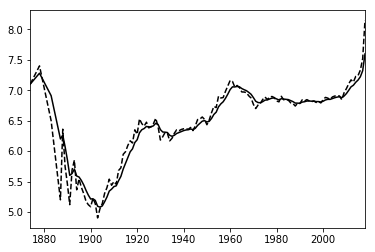

In [88]:
s.plot(style='k--')
s.ewm(span=5).mean().plot(style='k', 